In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [2]:
tf.random.set_seed(42)

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [4]:
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In [5]:
print(f"Training data shape: {X_train.shape}, Training labels shape: {y_train.shape}")
print(f"Test data shape: {X_test.shape}, Test labels shape: {y_test.shape}")

Training data shape: (60000, 28, 28), Training labels shape: (60000,)
Test data shape: (10000, 28, 28), Test labels shape: (10000,)


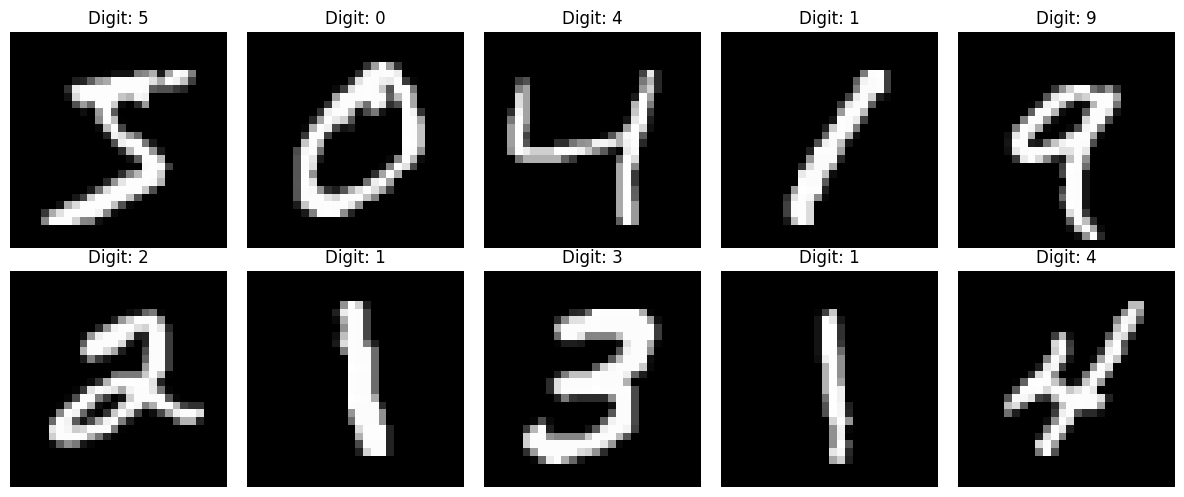

In [6]:
fig, axes = plt.subplots(2, 5, figsize=(12, 5))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_train[i], cmap='gray')
    ax.set_title(f"Digit: {y_train[i]}")
    ax.axis('off')
plt.tight_layout()
plt.show()

In [7]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

/opt/conda/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [8]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [9]:
history = model.fit(X_train, y_train, epochs=10, 
                    validation_split=0.1,
                    batch_size=32,
                    verbose=1)

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8453 - loss: 0.5152 - val_accuracy: 0.9687 - val_loss: 0.1043
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9537 - loss: 0.1547 - val_accuracy: 0.9770 - val_loss: 0.0833
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9636 - loss: 0.1142 - val_accuracy: 0.9760 - val_loss: 0.0781
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9701 - loss: 0.0962 - val_accuracy: 0.9783 - val_loss: 0.0718
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9739 - loss: 0.0810 - val_accuracy: 0.9808 - val_loss: 0.0732
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9768 - loss: 0.0695 - val_accuracy: 0.9803 - val_loss: 0.0720
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9792 - loss: 0.0631 - val_accuracy: 0.9808 - val_loss: 0.0690
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9805 - loss: 0.0572 - 

In [10]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"\nTest accuracy: {test_acc:.4f}")

313/313 - 0s - 2ms/step - accuracy: 0.9794 - loss: 0.0724

Test accuracy: 0.9794


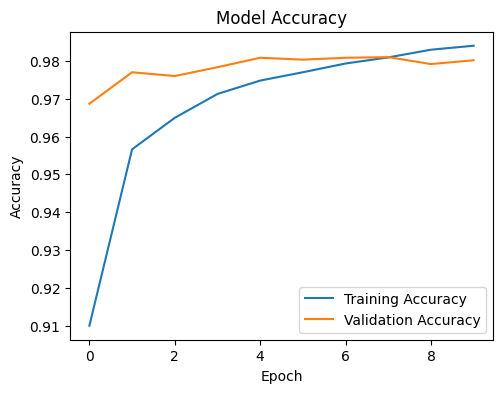

In [11]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

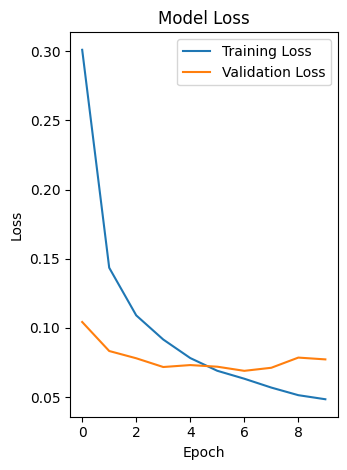

In [12]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [13]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


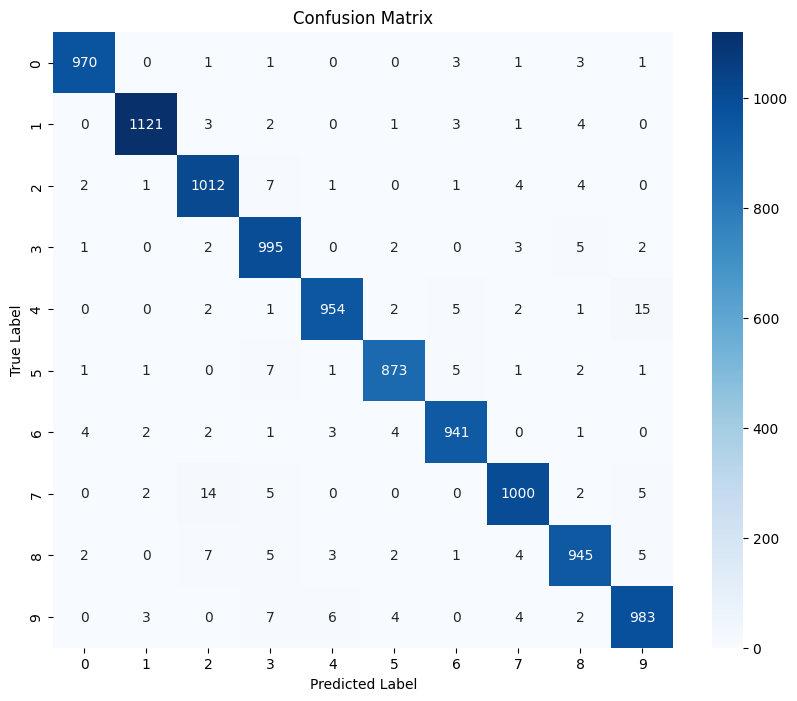

In [14]:
cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

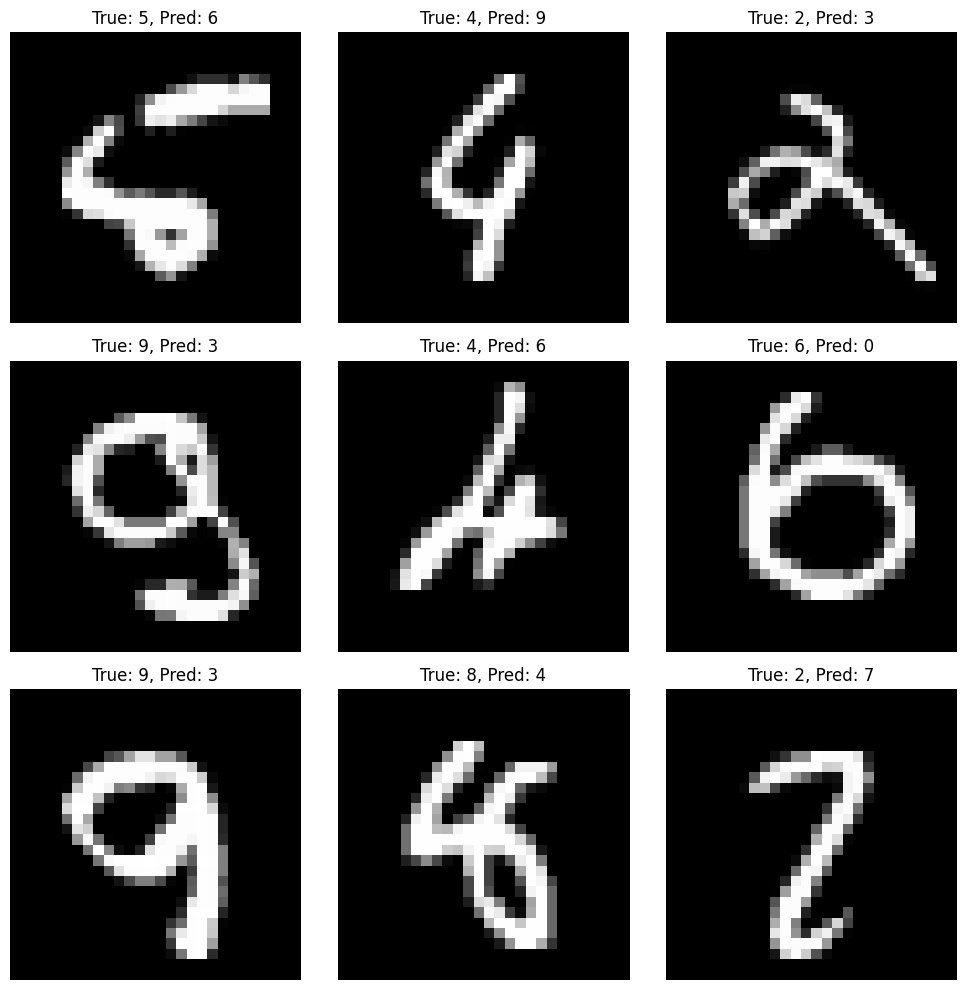

In [15]:
misclassified = np.where(y_pred_classes != y_test)[0]
fig, axes = plt.subplots(3, 3, figsize=(10, 10))
for i, ax in enumerate(axes.flat):
    if i < len(misclassified):
        idx = misclassified[i]
        ax.imshow(X_test[idx], cmap='gray')
        ax.set_title(f"True: {y_test[idx]}, Pred: {y_pred_classes[idx]}")
        ax.axis('off')
plt.tight_layout()
plt.show()

In [18]:
from sklearn.metrics import confusion_matrix, classification_report

In [19]:
class_names = [str(i) for i in range(10)]  # Digit names: '0' to '9'
class_report = classification_report(y_test, y_pred_classes, target_names=class_names)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.98      0.98      1032
           3       0.97      0.99      0.98      1010
           4       0.99      0.97      0.98       982
           5       0.98      0.98      0.98       892
           6       0.98      0.98      0.98       958
           7       0.98      0.97      0.98      1028
           8       0.98      0.97      0.97       974
           9       0.97      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [21]:
import pandas as pd

In [22]:
report_dict = classification_report(y_test, y_pred_classes, target_names=class_names, output_dict=True)
df = pd.DataFrame(report_dict).transpose()
df = df.drop('support', axis=1)  # Drop the 'support' column for better visualization
df = df.drop('accuracy', axis=0)  # Drop the 'accuracy' row as it's not class-specific

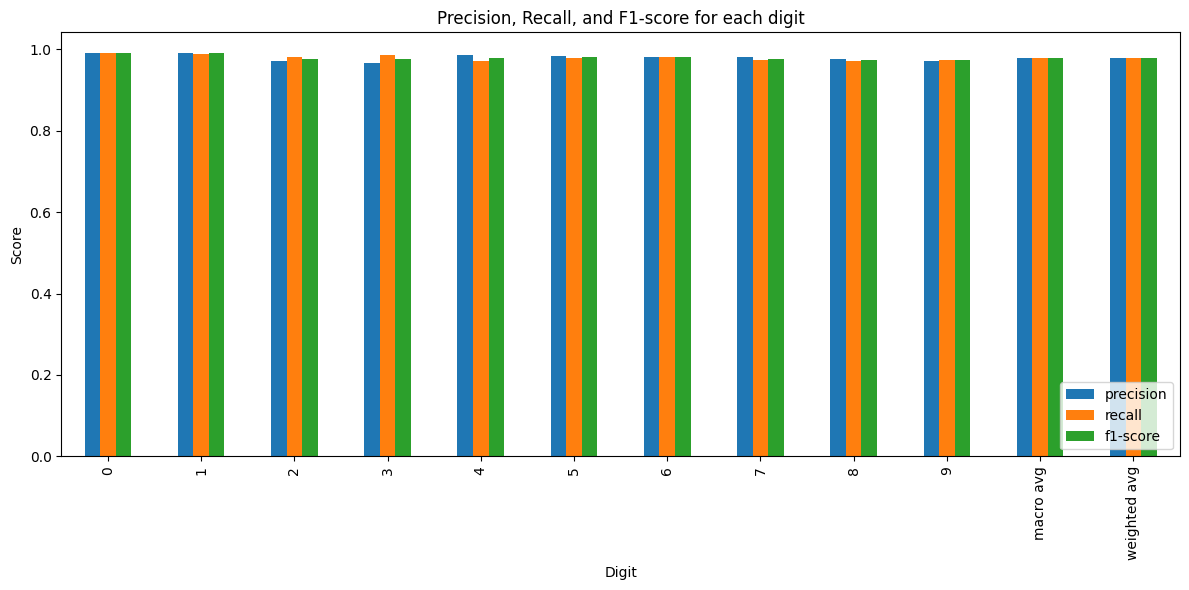

In [23]:
plt.figure(figsize=(12, 6))
df.plot(kind='bar', ax=plt.gca())
plt.title('Precision, Recall, and F1-score for each digit')
plt.xlabel('Digit')
plt.ylabel('Score')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

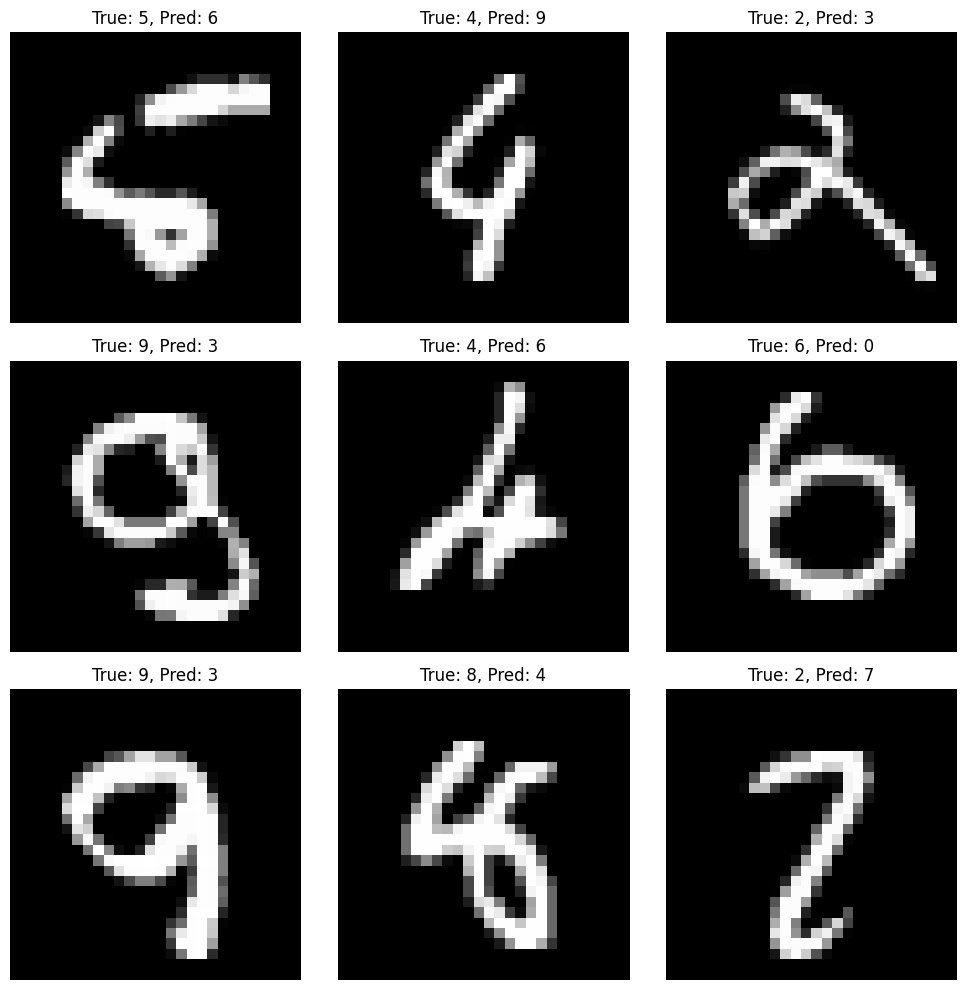

In [24]:
misclassified = np.where(y_pred_classes != y_test)[0]
fig, axes = plt.subplots(3, 3, figsize=(10, 10))
for i, ax in enumerate(axes.flat):
    if i < len(misclassified):
        idx = misclassified[i]
        ax.imshow(X_test[idx], cmap='gray')
        ax.set_title(f"True: {y_test[idx]}, Pred: {y_pred_classes[idx]}")
        ax.axis('off')
plt.tight_layout()
plt.show()